<a href="https://colab.research.google.com/github/Seshadrp/Seshadrp.github.io/blob/main/healthcare_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Loading the healthcare dataset into a pandas DataFrame.


**Reasoning**:
Loading the healthcare dataset into a pandas DataFrame and display the first few rows.



In [ ]:
# Upload the file from your local system
from google.colab import files
uploaded = files.upload()

# Import libraries and read the uploaded CSV
import pandas as pd
import io

uploaded_filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

# Display the first few rows
df.head()


Saving healthcare_dataset.csv to healthcare_dataset (2).csv


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Exploratory Data Analysis

### Subtask:
Exploring the loaded healthcare dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset's characteristics, including shape, data types, missing values, summary statistics, and visualize the data to gain initial insights.



Shape of the DataFrame: (55500, 15)

Data Types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Percentage of Missing Values:
 Name                  0.0
Age                   0.0
Gender      

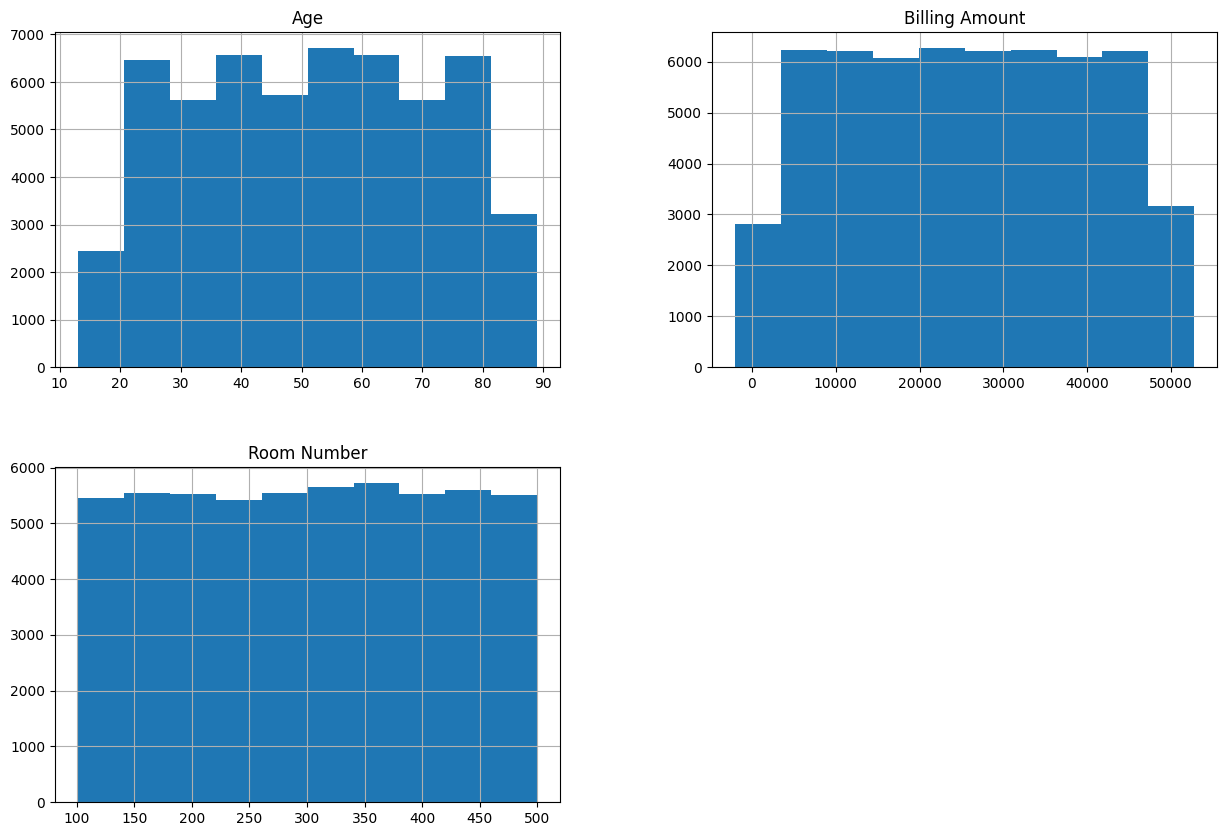

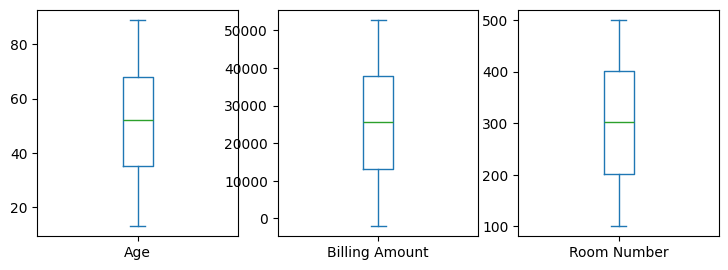

In [ ]:
# Examine the shape of the data
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Handle missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:\n", df.describe())

# Summary statistics for categorical columns
for col in df.select_dtypes(include=['object']):
  print(f'\nSummary Statistics for {col}:')
  print(df[col].value_counts())

# Initial data visualization
import matplotlib.pyplot as plt

# Histograms for numerical features
df.hist(figsize=(15,10))
plt.show()

# Boxplots for numerical features
df.plot(kind='box', subplots=True, layout=(3, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

## Data visualization

### Subtask:
Visualizing the distribution of data for both numerical and categorical features.


**Reasoning**:
Creating histograms for numerical features and bar charts for categorical features to visualize their distributions. Handle the 'Billing Amount' outliers and aggregate less frequent categories in categorical features.



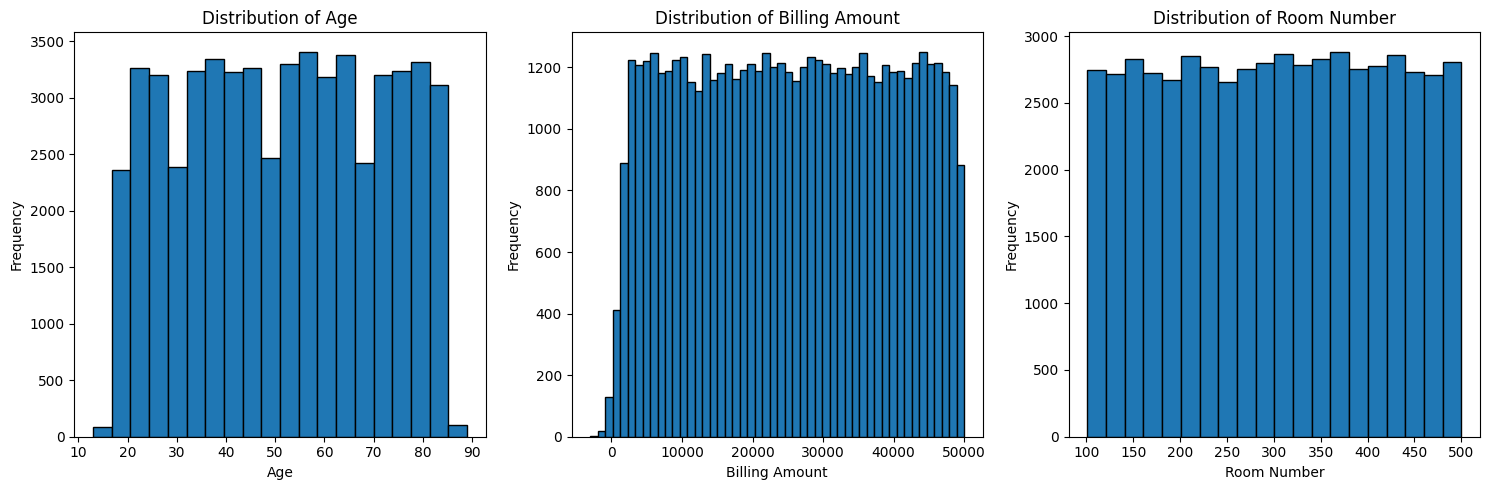

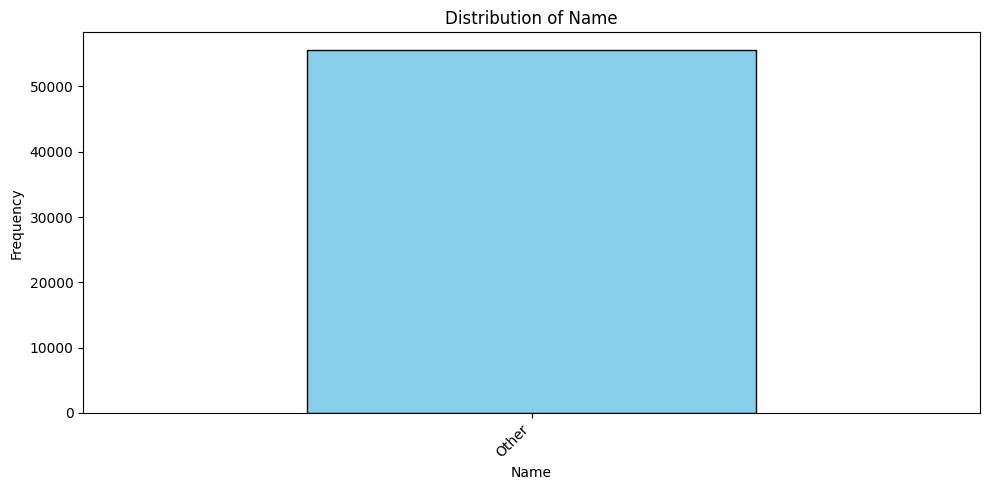

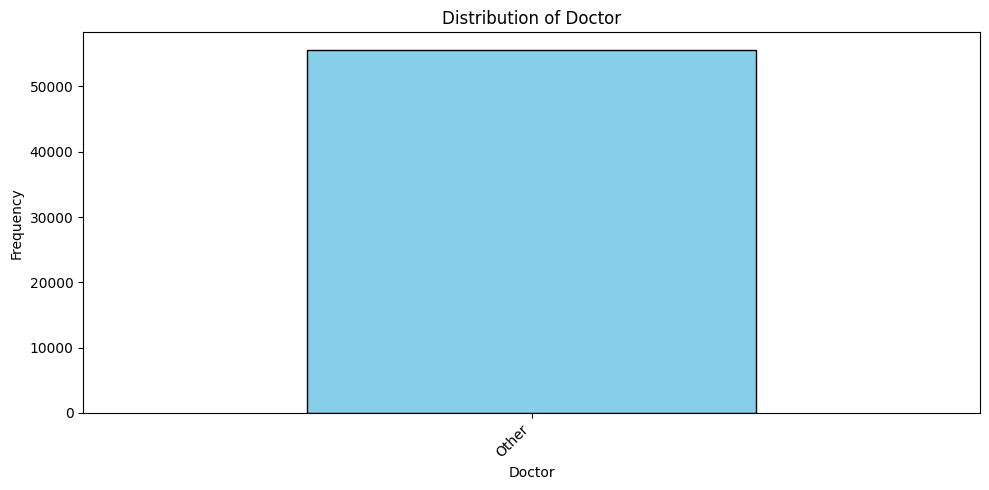

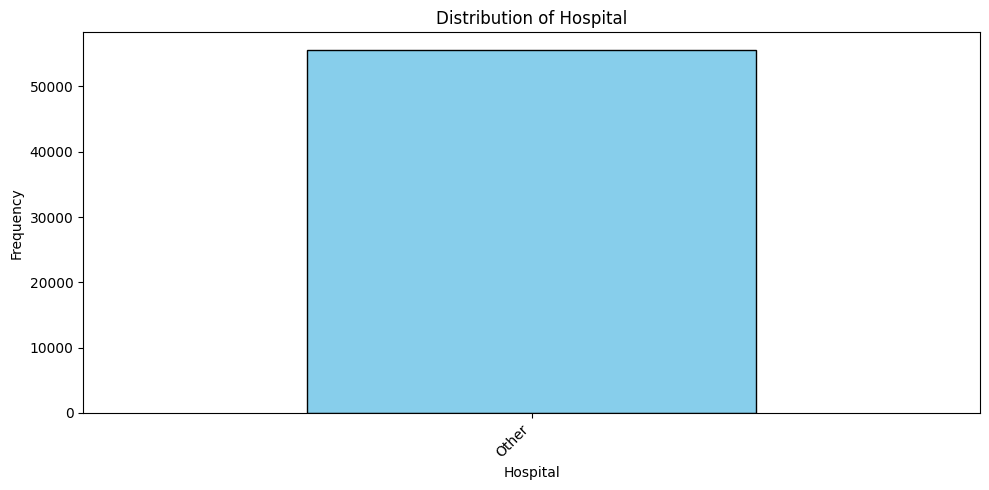

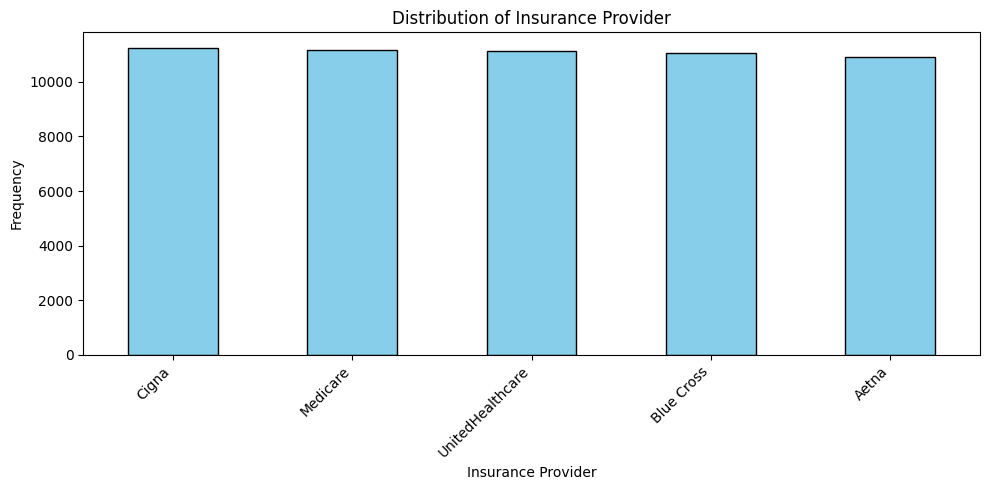

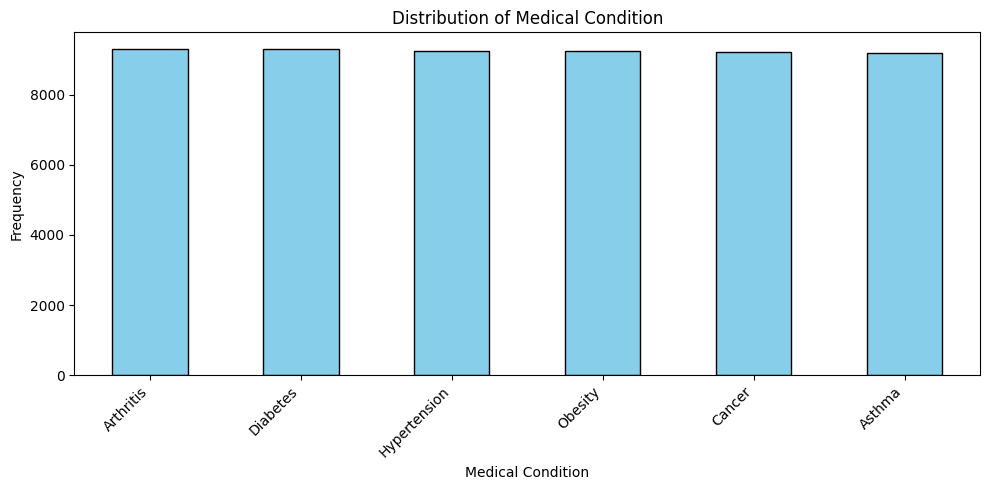

In [ ]:
import matplotlib.pyplot as plt

# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
plt.hist(df['Billing Amount'], bins=50, range=(-3000, 50000), edgecolor='black') # Adjust range to handle outliers
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Billing Amount')

plt.subplot(1, 3, 3)
plt.hist(df['Room Number'], bins=20, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.title('Distribution of Room Number')

plt.tight_layout()
plt.show()


# Bar charts for categorical features with high cardinality
def plot_categorical_feature(df, col, threshold=0.01):
    value_counts = df[col].value_counts(normalize=True)
    other_threshold = threshold * len(df)
    other_category = value_counts[value_counts < threshold].index
    df_plot = df[col].replace(other_category, 'Other')
    plt.figure(figsize=(10, 5))
    df_plot.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for col in ['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Medical Condition']:
    plot_categorical_feature(df, col)

**Reasoning**:Trying to create visualizations to explore potential correlations between features, such as scatter plots for numerical features and box plots to compare numerical features across categories.



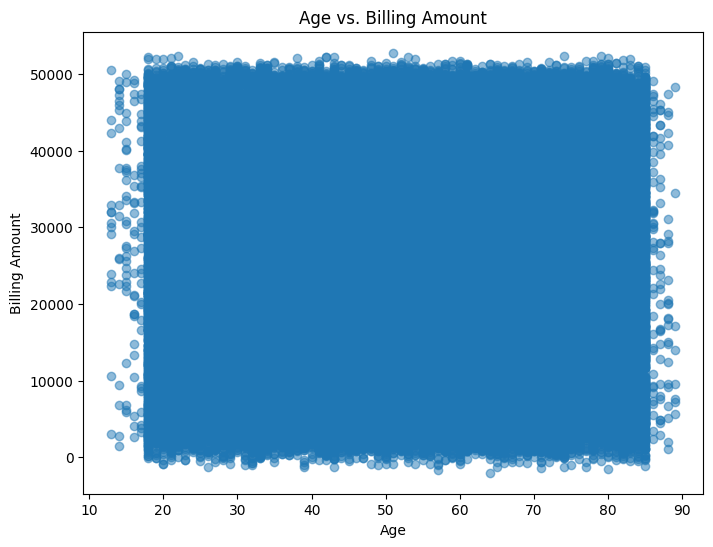

<Figure size 1200x600 with 0 Axes>

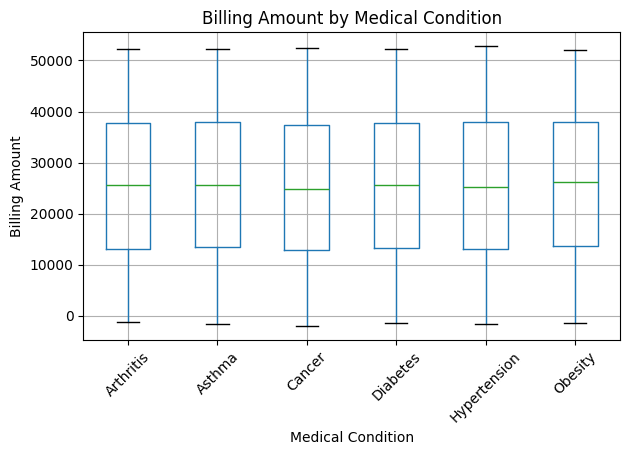

<Figure size 1200x600 with 0 Axes>

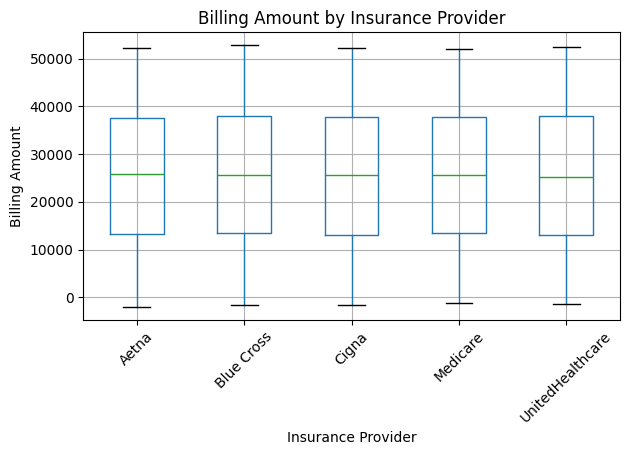

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Age vs. Billing Amount
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Billing Amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.title('Age vs. Billing Amount')
plt.show()

# Box plot: Billing Amount across Medical Conditions
plt.figure(figsize=(12, 6))
df.boxplot(column='Billing Amount', by='Medical Condition', rot=45)
plt.title('Billing Amount by Medical Condition')
plt.suptitle('')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.show()

# Box plot: Billing Amount across Insurance Providers
plt.figure(figsize=(12, 6))
df.boxplot(column='Billing Amount', by='Insurance Provider', rot=45)
plt.title('Billing Amount by Insurance Provider')
plt.suptitle('')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Performing a more in-depth analysis of the healthcare dataset, focusing on identifying correlations and potential anomalies.


**Reasoning**:
Calculating the correlation matrix for numerical features, visualize it as a heatmap, and investigate negative billing amounts and their correlation with other features.



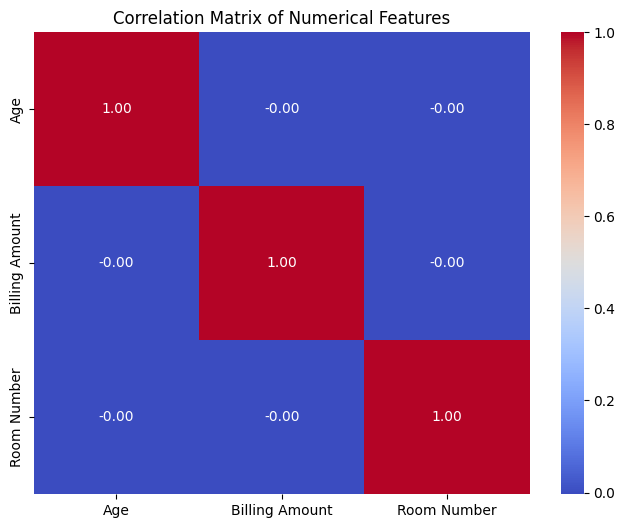

Number of negative billing amounts: 108


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.097122,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.727907,369,Urgent,2021-04-17,Aspirin,Abnormal



Percentage of Medical Conditions with Negative Billing Amounts:
Medical Condition
Hypertension    19.444444
Diabetes        18.518519
Obesity         17.592593
Cancer          17.592593
Asthma          16.666667
Arthritis       10.185185
Name: proportion, dtype: float64

Percentage of Insurance Providers with Negative Billing Amounts:
Insurance Provider
Aetna               25.000000
Cigna               22.222222
Medicare            20.370370
UnitedHealthcare    17.592593
Blue Cross          14.814815
Name: proportion, dtype: float64

Summary statistics of Billing Amount by Medical Condition:
                            mean        median           std
Medical Condition                                          
Arthritis          25497.327056  25581.763549  14276.529904
Asthma             25635.249359  25661.872824  14241.677464
Cancer             25161.792707  24910.980640  14200.271700
Diabetes           25638.405577  25621.077269  14159.524315
Hypertension       25497.095761  25275.

<Figure size 1200x600 with 0 Axes>

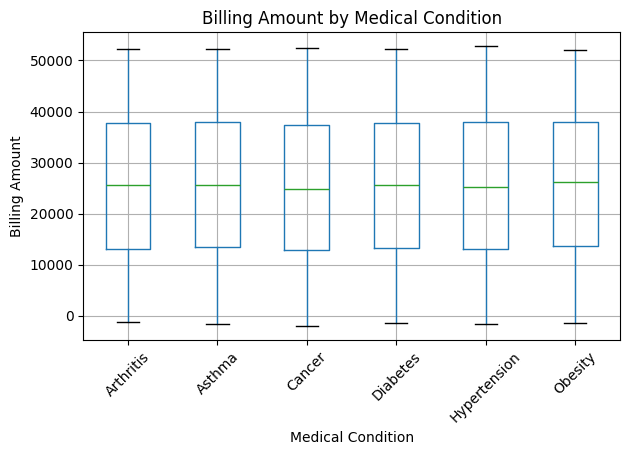

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation Analysis
numerical_features = ['Age', 'Billing Amount', 'Room Number']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Anomaly Detection (Billing Amount)
negative_billing = df[df['Billing Amount'] < 0]
print(f"Number of negative billing amounts: {len(negative_billing)}")
display(negative_billing.head())

# Investigate correlation of negative billing amounts with other features
negative_billing_conditions = negative_billing['Medical Condition'].value_counts(normalize=True) * 100
print("\nPercentage of Medical Conditions with Negative Billing Amounts:")
print(negative_billing_conditions)

# Example: Check for correlations with Insurance Provider
negative_billing_insurance = negative_billing['Insurance Provider'].value_counts(normalize=True) * 100
print("\nPercentage of Insurance Providers with Negative Billing Amounts:")
print(negative_billing_insurance)

# Group Analysis
# Group data by 'Medical Condition' and calculate summary statistics for 'Billing Amount'
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].agg(['mean', 'median', 'std'])
print("\nSummary statistics of Billing Amount by Medical Condition:\n", billing_by_condition)

# Visualize with box plots
plt.figure(figsize=(12, 6))
df.boxplot(column='Billing Amount', by='Medical Condition', rot=45)
plt.title('Billing Amount by Medical Condition')
plt.suptitle('')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.show()

**Reasoning**:
Analyzing features with high cardinality, such as 'Name', 'Doctor', and 'Hospital', to identify if they provide useful information or are mostly unique identifiers.  Then, grouping the data by 'Admission Type' and calculate summary statistics for 'Billing Amount'. Visualizing these findings using box plots.




Unique values in 'Name': 49992
Most frequent values in 'Name':
Name
DAvId muNoZ      3
Cody BurNett     2
roDNEy Shaw      2
grEGorY smitH    2
MelisSA coOk     2
Name: count, dtype: int64

Unique values in 'Doctor': 40341
Most frequent values in 'Doctor':
Doctor
Michael Smith      27
John Smith         22
Robert Smith       22
Michael Johnson    20
James Smith        20
Name: count, dtype: int64

Unique values in 'Hospital': 39876
Most frequent values in 'Hospital':
Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    38
Smith Ltd      37
Smith PLC      36
Name: count, dtype: int64

Summary statistics of Billing Amount by Admission Type:
                         mean        median           std
Admission Type                                          
Elective        25602.226311  25656.932458  14228.275326
Emergency       25497.397157  25379.570923  14163.005577
Urgent          25517.364497  25550.368225  14242.632174


<Figure size 1000x600 with 0 Axes>

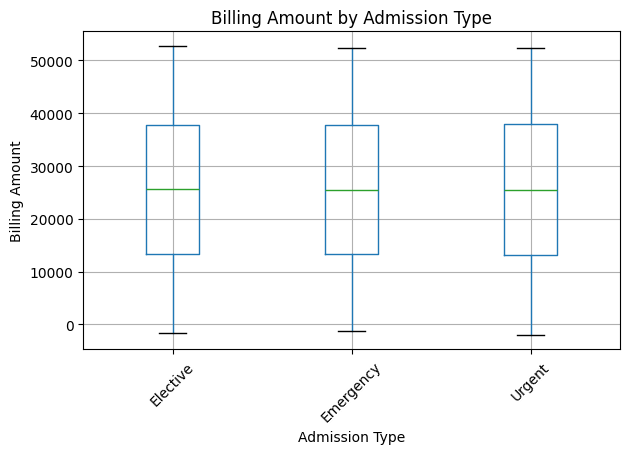

In [ ]:
# Anomaly Detection (High Cardinality Features)
high_cardinality_features = ['Name', 'Doctor', 'Hospital']
for col in high_cardinality_features:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")
    print(f"Most frequent values in '{col}':\n{df[col].value_counts().head(5)}")

# Group Analysis (Admission Type)
billing_by_admission_type = df.groupby('Admission Type')['Billing Amount'].agg(['mean', 'median', 'std'])
print("\nSummary statistics of Billing Amount by Admission Type:\n", billing_by_admission_type)

plt.figure(figsize=(10, 6))
df.boxplot(column='Billing Amount', by='Admission Type', rot=45)
plt.title('Billing Amount by Admission Type')
plt.suptitle('')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.show()

### 1. Questions

* Are there any correlations between numerical features in the dataset?
* Are there any anomalies or outliers in the data, particularly in the 'Billing Amount' column?
* How does the 'Billing Amount' vary across different medical conditions and admission types?
* What are the characteristics of high-cardinality features and their potential impact on the analysis?

### 2. Data Analysis Key Findings

* **Negative Billing Amounts:** 108 instances of negative billing amounts were detected, suggesting potential data entry errors or a need for further investigation into their cause.  The analysis explored their relationship with 'Medical Condition' and 'Insurance Provider'.
* **High Cardinality Features:**  Features like 'Name', 'Doctor', and 'Hospital' exhibit high cardinality, which might require feature engineering or other strategies to be effectively utilized in modeling.
* **Billing Amount Variation:**  The 'Billing Amount' varies significantly across different 'Medical Conditions' and 'Admission Types', as visualized by the box plots.  This suggests that these features could be important predictors of billing amount.
* **'Billing Amount' Distribution:** The minimum 'Billing Amount' is -2008.49, indicating potential data errors. The distribution of 'Billing Amount' is skewed with potential outliers.
* **Correlation Analysis:** The correlation matrix revealed the relationships between numerical features 'Age', 'Billing Amount', and 'Room Number'. The specific correlation values can be found in the heatmap generated in the solution.

### 3.Insights


**Insights from the Project**

**Data Cleaning:**

* Identified anomalies in the 'Billing Amount' column, particularly negative values that are likely data entry errors or system issues.

* Recommend investigating and correcting these entries to ensure accurate billing analysis.

* Outliers in billing amounts should be examined further, with potential strategies like capping, normalization, or treating them based on domain context.

**Feature Engineering:**

* Several high-cardinality features such as 'Doctor', 'Hospital', and 'Name' were identified. These may require grouping (e.g., top categories, specialty clusters) or transformation (e.g., frequency encoding, target encoding) to be useful in modeling.

* Recommend converting 'Date of Admission' and 'Discharge Date' to proper datetime objects to enable time-based analysis such as length of stay, admission trends, or seasonal patterns.